In [1]:
import joblib
import numpy as np

In [2]:
file_path = 'variables_ckks.pkl'

data = joblib.load(file_path)

weights_unenc_ckks, bias_unenc_ckks, accuracy_ckks, y_pred_unenc_ckks, cpu_seconds_ckks, cpu_usages_ckks, ram_usages_ckks, train_time_ckks, testing_time_ckks = data

In [3]:
file_path = 'variables_sklearn.pkl'

data = joblib.load(file_path)

weights_unenc_sklearn, bias_unenc_sklearn, accuracy_sklearn, y_pred_unenc_sklearn, cpu_seconds_sklearn, cpu_usages_sklearn, ram_usages_sklearn, train_time_sklearn, testing_time_sklearn = data

In [4]:
file_path = 'variables_paillier.pkl'

data = joblib.load(file_path)

weights_unenc_paillier, bias_unenc_paillier, accuracy_paillier, y_pred_unenc_paillier, cpu_seconds_paillier, cpu_usages_paillier, ram_usages_paillier, train_time_paillier, testing_time_paillier = data

In [5]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9954827780914738
P-value: 6.26584416722018e-22


In [6]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00015136293646381512


In [7]:
len(weights_unenc_ckks), len(weights_unenc_paillier)

(22, 22)

In [8]:
correlation, p_value = spearmanr(weights_unenc_sklearn, weights_unenc_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 0.9954827780914738
P-value: 6.26584416722018e-22


In [9]:
mse = mean_squared_error(weights_unenc_sklearn, weights_unenc_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00015135471434556393


In [10]:
weights_unenc_ckks

[0.0587476005220892,
 0.211065100381582,
 -0.024944700931275557,
 0.17217220192252503,
 -0.10887489838921245,
 0.0237975004635364,
 -0.00972740174752676,
 0.02265250003305329,
 0.3464674009141069,
 0.11069179916412838,
 0.21363759988467235,
 0.23628279934052376,
 0.13906379936833085,
 0.10515780246815191,
 0.15033850043428854,
 0.10675980006803527,
 0.10893879993336596,
 -0.059158701237083736,
 -0.0743538012260886,
 -0.21179830010196282,
 -0.28071170207610135,
 -0.08063389872616024]

In [11]:
weights_unenc_sklearn

array([ 0.04740904,  0.21305059, -0.01169338,  0.17062014, -0.1297572 ,
        0.01380176, -0.02534812,  0.02317172,  0.34741428,  0.1045154 ,
        0.19215351,  0.22666325,  0.12714138,  0.08809487,  0.13486114,
        0.09261589,  0.11591513, -0.06383095, -0.07720103, -0.22246344,
       -0.27685293, -0.10442334])

In [12]:
weights_unenc_paillier

[0.0587476809186387,
 0.21106623111020514,
 -0.02494508340411475,
 0.17216786318613062,
 -0.10887286180480688,
 0.023796668546862923,
 -0.009727902542155996,
 0.022652532913029134,
 0.3464666159082525,
 0.11069404051288387,
 0.21363708007283605,
 0.2362811374594583,
 0.13906471213301308,
 0.10515637912947239,
 0.15033815255135335,
 0.10675769522693511,
 0.10893625166838194,
 -0.05915955919571962,
 -0.07435441274341797,
 -0.2117999717482221,
 -0.28071038119813224,
 -0.08063565671816043]

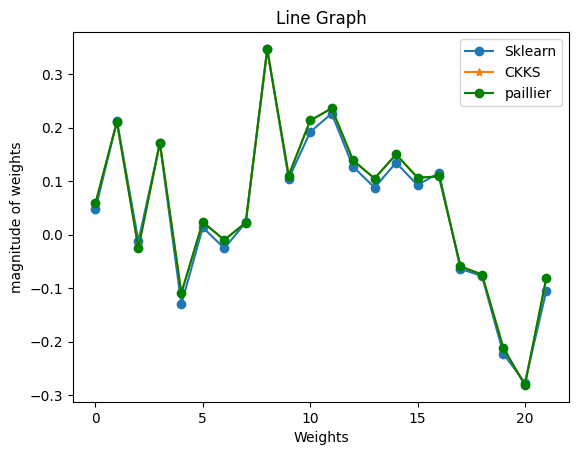

In [13]:
import matplotlib.pyplot as plt

plt.plot(weights_unenc_sklearn, label='Sklearn', marker='o')  
plt.plot(weights_unenc_ckks, label='CKKS', marker='*')  
plt.plot(weights_unenc_paillier, label='paillier', color='green', marker='o')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

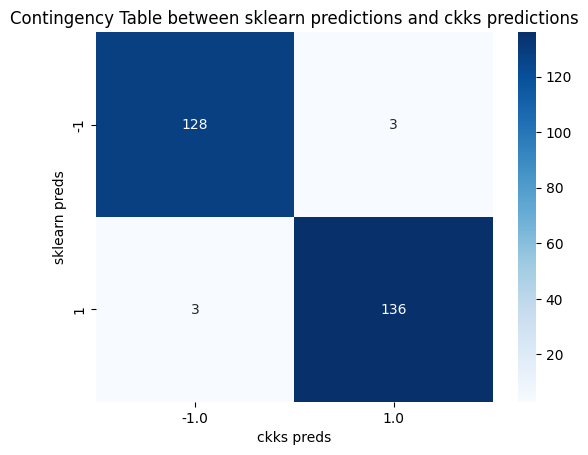

In [14]:
import seaborn as sns
import pandas as pd
data = {'sklearn_preds': y_pred_unenc_sklearn, 'ckks_preds': y_pred_unenc_ckks}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['ckks_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('ckks preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and ckks predictions')

plt.show()

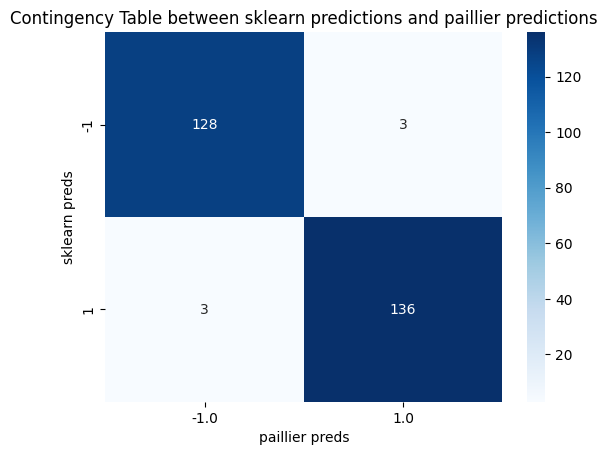

In [15]:

data = {'sklearn_preds': y_pred_unenc_sklearn, 'paillier_preds': y_pred_unenc_paillier}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['sklearn_preds'], df['paillier_preds'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

plt.xlabel('paillier preds')
plt.ylabel('sklearn preds')
plt.title('Contingency Table between sklearn predictions and paillier predictions')

plt.show()

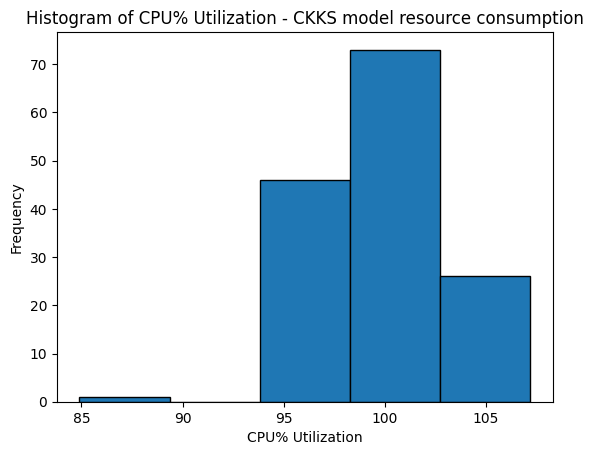

In [16]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 70]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [17]:
print(np.mean(filtered_ckks_cpu_util))
print(np.median(filtered_ckks_cpu_util))

99.78493150684932
100.1


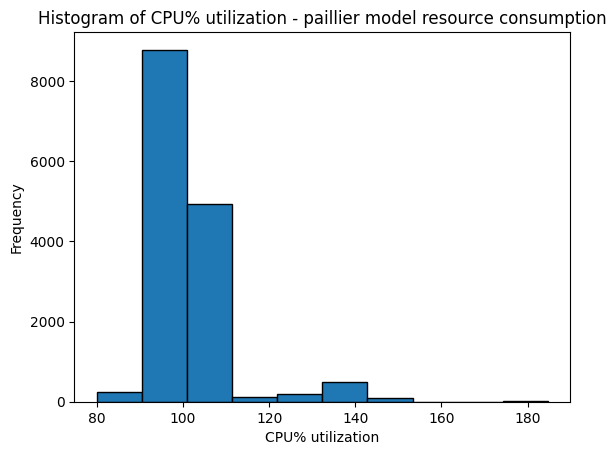

In [18]:
# Plot the histogram

filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [19]:
print(np.mean(filtered_paillier_cpu_util))
print(np.median(filtered_paillier_cpu_util))

101.86120244246125
99.9


Text(0.5, 1.0, 'Line Graph of ram% util for ckks model')

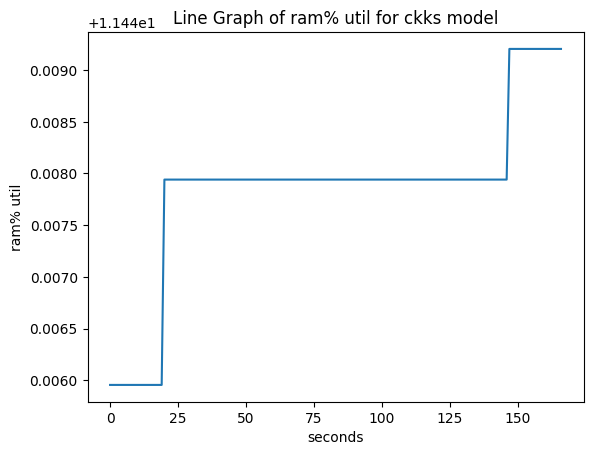

In [20]:
plt.plot(ram_usages_ckks)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for ckks model')

In [21]:
import numpy as np
np.mean(ram_usages_ckks)

11.44785434811144

Text(0.5, 1.0, 'Line Graph of ram% util for paillier model')

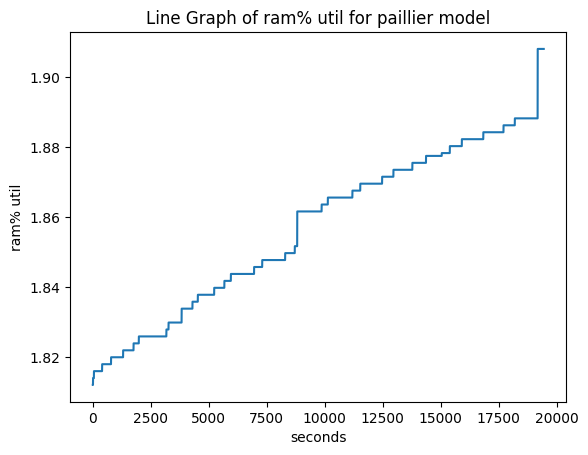

In [22]:
plt.plot(ram_usages_paillier)

# Add labels and title
plt.xlabel('seconds')
plt.ylabel('ram% util')
plt.title('Line Graph of ram% util for paillier model')

In [23]:
np.mean(ram_usages_paillier)

1.8571227203764729

In [24]:
np.mean(ram_usages_sklearn)

1.5946475893234695

In [25]:
train_time_ckks

161.5695493221283

In [26]:
train_time_paillier

19592.34011363983

In [27]:
testing_time_ckks

11.493041515350342

In [28]:
testing_time_paillier

860.6747894287109

In [29]:
accuracy_ckks, accuracy_sklearn, accuracy_paillier

(0.8333333333333334, 0.825925925925926, 0.8333333333333334)